In [1]:
#Much of the scraping code is taken from this repository: https://github.com/chmartin/FBref_EPL
#I've made the the necessary changes for the recently added data and for combining it

In [1]:
# #standard(stats)
# stats = ["player","nationality","position","squad","age","birth_year","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"]
# stats3 = ["players_used","possession","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"] 
# #goalkeeping(keepers)
# keepers = ["player","nationality","position","squad","age","birth_year","games_gk","games_starts_gk","minutes_gk","goals_against_gk","goals_against_per90_gk","shots_on_target_against","saves","save_pct","wins_gk","draws_gk","losses_gk","clean_sheets","clean_sheets_pct","pens_att_gk","pens_allowed","pens_saved","pens_missed_gk"]
# keepers3 = ["players_used","games_gk","games_starts_gk","minutes_gk","goals_against_gk","goals_against_per90_gk","shots_on_target_against","saves","save_pct","wins_gk","draws_gk","losses_gk","clean_sheets","clean_sheets_pct","pens_att_gk","pens_allowed","pens_saved","pens_missed_gk"]
# #advance goalkeeping(keepersadv)
# keepersadv = ["player","nationality","position","squad","age","birth_year","minutes_90s","goals_against_gk","pens_allowed","free_kick_goals_against_gk","corner_kick_goals_against_gk","own_goals_against_gk","psxg_gk","psnpxg_per_shot_on_target_against","psxg_net_gk","psxg_net_per90_gk","passes_completed_launched_gk","passes_launched_gk","passes_pct_launched_gk","passes_gk","passes_throws_gk","pct_passes_launched_gk","passes_length_avg_gk","goal_kicks","pct_goal_kicks_launched","goal_kick_length_avg","crosses_gk","crosses_stopped_gk","crosses_stopped_pct_gk","def_actions_outside_pen_area_gk","def_actions_outside_pen_area_per90_gk","avg_distance_def_actions_gk"]
# keepersadv2 = ["minutes_90s","goals_against_gk","pens_allowed","free_kick_goals_against_gk","corner_kick_goals_against_gk","own_goals_against_gk","psxg_gk","psnpxg_per_shot_on_target_against","psxg_net_gk","psxg_net_per90_gk","passes_completed_launched_gk","passes_launched_gk","passes_pct_launched_gk","passes_gk","passes_throws_gk","pct_passes_launched_gk","passes_length_avg_gk","goal_kicks","pct_goal_kicks_launched","goal_kick_length_avg","crosses_gk","crosses_stopped_gk","crosses_stopped_pct_gk","def_actions_outside_pen_area_gk","def_actions_outside_pen_area_per90_gk","avg_distance_def_actions_gk"]
# #shooting(shooting)
# shooting = ["player","nationality","position","squad","age","birth_year","minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
# shooting2 = ["minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
# shooting3 = ["goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
# #passing(passing)
# passing = ["player","nationality","position","squad","age","birth_year","minutes_90s","passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
# passing2 = ["passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
# #passtypes(passing_types)
# passing_types = ["player","nationality","position","squad","age","birth_year","minutes_90s","passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]
# passing_types2 = ["passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]
# #goal and shot creation(gca)
# gca = ["player","nationality","position","squad","age","birth_year","minutes_90s","sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_og_for"]
# gca2 = ["sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_og_for"]
# #defensive actions(defense)
# defense = ["player","nationality","position","squad","age","birth_year","minutes_90s","tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]
# defense2 = ["tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]
# #possession(possession)
# possession = ["player","nationality","position","squad","age","birth_year","minutes_90s","touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","progressive_carries","carries_into_final_third","carries_into_penalty_area","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]
# possession2 = ["touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","progressive_carries","carries_into_final_third","carries_into_penalty_area","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]
# #playingtime(playingtime)
# playingtime = ["player","nationality","position","squad","age","birth_year","minutes_90s","games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]
# playingtime2 = ["games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]
# #miscallaneous(misc)
# misc = ["player","nationality","position","squad","age","birth_year","minutes_90s","cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]
# misc2 = ["cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]

In [1]:
stats_columns = ["player", "position", "squad", "age","minutes","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"]
#passing(passing)
passing2 = ["player", "progressive_passes"]
#goal and shot creation(gca)
gca2 = ["player", "sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled"]
#possession(possession)
possession2 = ["player","progressive_carries"]


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import sys, getopt
import csv
import lxml
from scipy import stats
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
%matplotlib widget
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
#Functions to get the data in a dataframe using BeautifulSoup

def get_table(url):
    print("url: " + url)
    res = requests.get(url)
    ## The next two lines get around the issue with comments breaking the parsing.
    comm = re.compile("<!--|-->")
    soup = BeautifulSoup(comm.sub("",res.text),'lxml')
    all_tables = soup.findAll("tbody")
    player_table = all_tables[2]
    return player_table

def get_frame(features, player_table):
    pre_df_player = dict()
    features_wanted_player = features
    rows_player = player_table.find_all('tr')
    for row in rows_player:
        if(row.find('th',{"scope":"row"}) != None):
    
            for f in features_wanted_player:
                cell = row.find("td",{"data-stat": f})
                if cell == None:
                    print("Could not get " + f + " for " + str(row))
                    continue
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if(text == ''):
                    text = '0'
                if((f!='player')&(f!='nationality')&(f!='position')&(f!='squad')&(f!='age')&(f!='birth_year')):
                    text = float(text.replace(',',''))
                if f in pre_df_player:
                    pre_df_player[f].append(text)
                else:
                    pre_df_player[f] = [text]
    df_player = pd.DataFrame.from_dict(pre_df_player)
    return df_player


def frame_for_category(category,top,end,features):
    url = (top + category + end)
    player_table = get_table(url)
    df_player = get_frame(features, player_table)
    return df_player


In [4]:
#Function to get the player data for outfield player, includes all categories - standard stats, shooting
#passing, passing types, goal and shot creation, defensive actions, possession, and miscallaneous
def get_outfield_data(top, end):
    df1 = frame_for_category('stats',top,end,stats_columns)
    df3 = frame_for_category('passing',top,end,passing2)
    df5 = frame_for_category('gca',top,end,gca2)
    df7 = frame_for_category('possession',top,end,possession2)
    df = pd.concat([df1, df3, df5, df7], axis=1)
    # df = pd.concat([df1], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [5]:
#This cell is to get the outfield player data for any competition

#Go to the 'Standard stats' page of the league
#For Premier League 2019/20, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
#Remove the 'stats', and pass the first and third part of the link as parameters like below
df_outfield = get_outfield_data('https://fbref.com/en/comps/9/','/Premier-League-Stats')

#Save csv file to Desktop
df_outfield.to_csv('PL2021_Outfield.csv',index=False)




url: https://fbref.com/en/comps/9/stats/Premier-League-Stats
url: https://fbref.com/en/comps/9/passing/Premier-League-Stats
url: https://fbref.com/en/comps/9/gca/Premier-League-Stats
url: https://fbref.com/en/comps/9/possession/Premier-League-Stats


In [6]:
df_outfield.columns

Index(['player', 'position', 'squad', 'age', 'minutes', 'xg_per90', 'xa_per90',
       'xg_xa_per90', 'npxg_per90', 'npxg_xa_per90', 'progressive_passes',
       'sca_per90', 'sca_passes_live', 'sca_passes_dead', 'sca_dribbles',
       'sca_shots', 'sca_fouled', 'progressive_carries'],
      dtype='object')

In [7]:
df_outfield["progressive_passes_per90"] = df_outfield["progressive_passes"]/(df_outfield["minutes"]/90)
df_outfield["progressive_carries_per90"] = df_outfield["progressive_carries"]/(df_outfield["minutes"]/90)

In [8]:
df_outfield.head()

,player,position,squad,age,minutes,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,progressive_passes,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,progressive_carries,progressive_passes_per90,progressive_carries_per90
0,Max Aarons,DF,Norwich City,21-352,1530.0,0.03,0.05,0.08,0.03,0.08,63.0,1.35,19.0,0.0,1.0,2.0,1.0,101.0,3.705882,5.941176
1,Che Adams,FW,Southampton,25-162,858.0,0.25,0.15,0.40,0.25,0.40,16.0,2.10,14.0,0.0,1.0,0.0,4.0,16.0,1.678322,1.678322
2,Rayan Aït Nouri,DF,Wolves,20-199,718.0,0.04,0.07,0.11,0.04,0.11,17.0,1.88,6.0,5.0,3.0,0.0,0.0,60.0,2.130919,7.520891
3,Kristoffer Ajer,DF,Brentford,23-249,565.0,0.03,0.05,0.07,0.03,0.07,12.0,0.96,4.0,1.0,0.0,1.0,0.0,15.0,1.911504,2.389381
4,Nathan Aké,DF,Manchester City,26-307,401.0,0.06,0.00,0.06,0.06,0.06,11.0,0.00,0.0,0.0,0.0,0.0,0.0,32.0,2.468828,7.182045


In [9]:
df_outfield.position.unique()

array(['DF', 'FW', 'FW,MF', 'MF', 'GK', 'MF,FW', 'DF,MF', 'MF,DF',
       'DF,FW', 'FW,DF'], dtype=object)

In [10]:
golden_metrics = ["player", "squad", "position", "age", "minutes", "xa_per90", "npxg_per90", "progressive_carries_per90", "progressive_passes_per90", "sca_per90"]
golden_df = df_outfield[golden_metrics]
golden_df["age"] = golden_df["age"].apply(lambda age: int(age.split('-')[0]))

In [34]:
max_age = 35
young_df = golden_df[(golden_df.age <= max_age) & (golden_df.minutes > 400.0)]
# young_df = young_df[young_df.position.apply(lambda s: "MF" in s)]
young_df = young_df[young_df.squad.apply(lambda s: s not in ["Chelsea", "Manchester City", "Liverpool"])]

In [35]:
kpis = ["xa_per90", "npxg_per90", "progressive_carries_per90", "progressive_passes_per90", "sca_per90"]

def normalise_cols(df, cols):
    new_df = pd.DataFrame()
    for c in cols:
        new_df[c] = df[c].apply(lambda v: stats.percentileofscore(df[c], v))
    return new_df

In [36]:
norm_df = normalise_cols(young_df, kpis)
young_df["overall_score"] = norm_df.xa_per90 + norm_df.npxg_per90 + norm_df.progressive_carries_per90 + norm_df.progressive_passes_per90 + norm_df.sca_per90

In [37]:
young_df["pg_pc_per90"] = young_df.progressive_carries_per90 + young_df.progressive_passes_per90

In [38]:
young_df["xa_npxg_per90"] = young_df.xa_per90 + young_df.npxg_per90

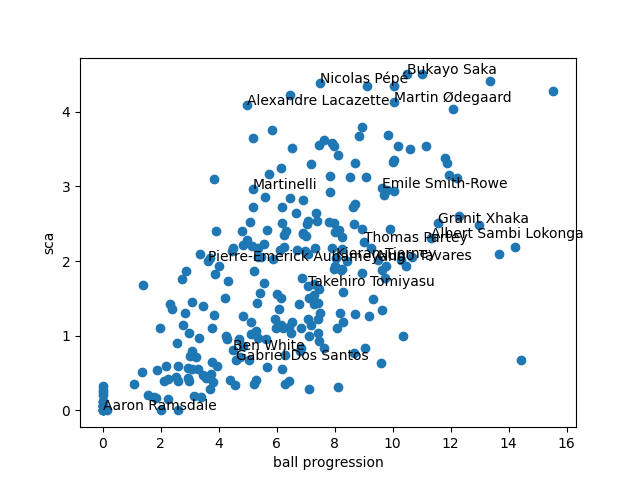

In [39]:
%matplotlib widget
plt.close()
plt.scatter(young_df.pg_pc_per90, young_df.sca_per90)
plt.xlabel("ball progression")
plt.ylabel("sca")
for i, row in young_df.iterrows():
    if row.squad == "Arsenal":
        plt.annotate(row["player"], (row["pg_pc_per90"], row["sca_per90"]))
plt.show()

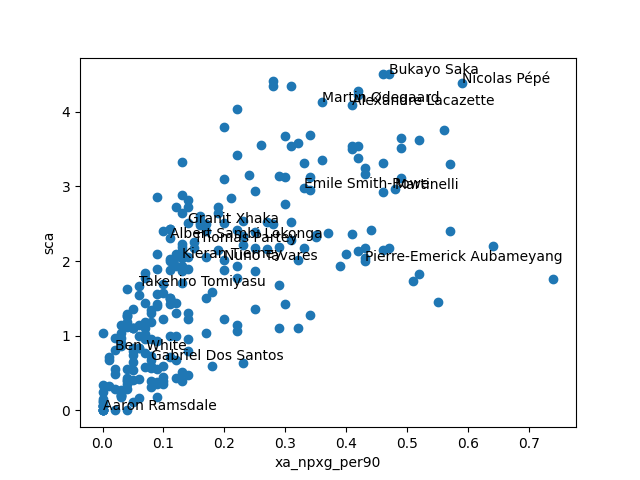

In [40]:
plt.close()
plt.scatter(young_df.xa_npxg_per90, young_df.sca_per90)
plt.xlabel("xa_npxg_per90")
plt.ylabel("sca")
for i, row in young_df.iterrows():
    if row.squad == "Arsenal":
        plt.annotate(row["player"], (row["xa_npxg_per90"], row["sca_per90"]))
plt.show()

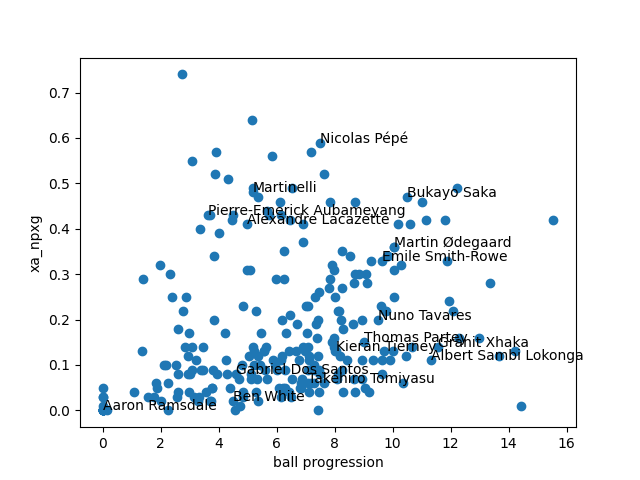

In [41]:
plt.close()
plt.scatter(young_df.pg_pc_per90, young_df.xa_npxg_per90)
plt.xlabel("ball progression")
plt.ylabel("xa_npxg")
for i, row in young_df.iterrows():
    if row.squad == "Arsenal":
        plt.annotate(row["player"], (row["pg_pc_per90"], row["xa_npxg_per90"]))
plt.show()

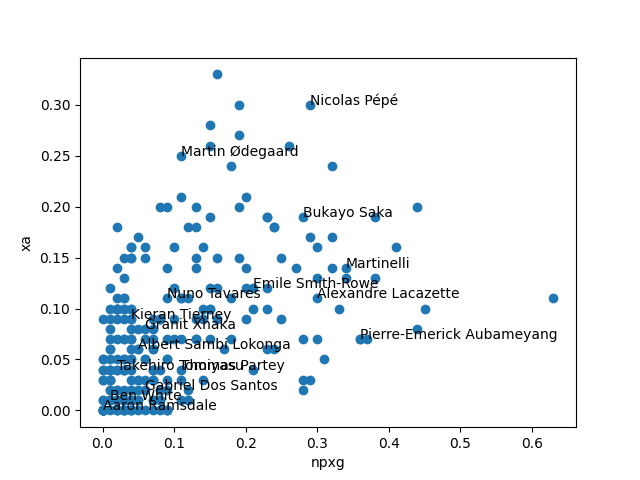

In [52]:
plt.close()
plt.scatter(young_df.npxg_per90, young_df.xa_per90)
plt.xlabel("npxg")
plt.ylabel("xa")
for i, row in young_df.iterrows():
    if row.squad == "Arsenal":
        plt.annotate(row["player"], (row["npxg_per90"], row["xa_per90"]))
plt.show()

<AxesSubplot:>

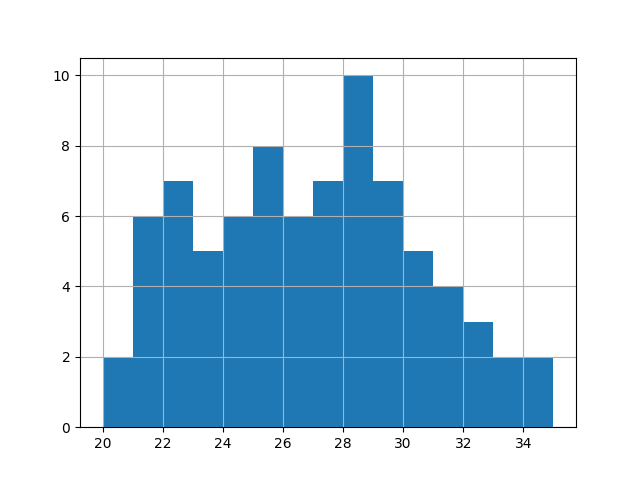

In [57]:
plt.close()
young_df.sort_values("progressive_passes_per90", ascending=False).reset_index(drop=True).head(80).age.hist(bins=15)

In [60]:
young_df.sort_values("npxg_per90", ascending=False).reset_index(drop=True).head(80)

,player,squad,position,age,minutes,xa_per90,npxg_per90,progressive_carries_per90,progressive_passes_per90,sca_per90,overall_score,pg_pc_per90,xa_npxg_per90
0,Patrick Bamford,Leeds United,FW,28,459.0,0.11,0.63,1.568627,1.176471,1.76,263.127413,2.745098,0.74
1,Christian Benteke,Crystal Palace,FW,31,992.0,0.10,0.45,2.086694,0.997984,1.45,256.563707,3.084677,0.55
2,Jamie Vardy,Leicester City,FW,34,1231.0,0.08,0.44,2.485784,1.389115,1.83,266.023166,3.874898,0.52
3,Harry Kane,Tottenham,FW,28,1189.0,0.20,0.44,2.800673,2.346510,2.20,345.366795,5.147183,0.64
4,Joshua King,Watford,FW,29,1086.0,0.16,0.41,2.900552,0.994475,2.40,313.899614,3.895028,0.57
5,Armando Broja,Southampton,FW,20,623.0,0.13,0.38,3.178170,1.155698,1.73,293.436293,4.333868,0.51
6,Son Heung-min,Tottenham,"FW,MF",29,1228.0,0.19,0.38,5.350163,1.832248,3.30,392.471042,7.182410,0.57
7,Ollie Watkins,Aston Villa,FW,25,1272.0,0.07,0.37,3.820755,1.839623,2.41,314.864865,5.660377,0.44
8,Pierre-Emerick Aubameyang,Arsenal,FW,32,1037.0,0.07,0.36,2.516876,1.128255,2.00,258.880309,3.645130,0.43
9,Neal Maupay,Brighton,FW,25,1017.0,0.07,0.36,2.566372,1.150442,2.04,261.969112,3.716814,0.43
